In [ ]:
%load_ext autoreload
%load_ext line_profiler

In [ ]:
%autoreload 

import sys
sys.path.append('../../..')
import pickle

import numpy as np
from tqdm import tqdm_notebook as tqdm

import matplotlib
matplotlib.rc_file('../../matplotlibrc')
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
import matplotlib.colors as colors
%matplotlib inline

import darkhistory.physics as phys
import main
import config


Bad key text.latex.preview in file ../../matplotlibrc, line 10 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution


In [ ]:
%autoreload 

# mDM = 7.2e6
# mDM = 9e6
mDM = 2e8

params_list = [{'pri':'phot', 'DM_process':'decay', 
                'mDM':mDM, 'inj_param':4e40
            }]

options_dict = {
    'start_rs': 3000, 'high_rs': 1.555e3, 'end_rs':4, 'cross_check':False, 'elec_method':'new',
    #'reion_switch':True, 'reion_method':'Puchwein', 'heat_switch':True,
    'reion_switch':False, 'reion_method':'Puchwein', 'heat_switch':False,
    'coarsen_factor':16, 'distort':False, 'fexc_switch': False, 'backreaction':False,
    'reprocess_distortion':False, 'nmax':10, 'rtol':1e-6, 'use_tqdm':True, 'tqdm_jupyter':True, 'iterations':1
}

# options_dict = {
#     'start_rs': 3000, 'high_rs': 1.555e3, 'end_rs':4, 'cross_check':False, 'elec_method':'new',
#     #'reion_switch':True, 'reion_method':'Puchwein', 'heat_switch':True,
#     'reion_switch':False, 'reion_method':'Puchwein', 'heat_switch':False,
#     'coarsen_factor':16, 'distort':False, 'fexc_switch': False, 'backreaction':False,
#     'reprocess_distortion':False, 'nmax':10, 'rtol':1e-6, 'use_tqdm':True, 'tqdm_jupyter':True, 'iterations':1
# }

output_dir = '/scratch/gpfs/hongwanl/DarkHistory/scratch/'

main.embarrassingly_parallel_evolve(
    params_list, 0, options_dict, output_dir, 'max_CMB_no_BR_no_distort_TLA_new'
)

  0%|          | 0/414.0 [00:00<?, ?it/s]

Successfully produced file:  /scratch/gpfs/hongwanl/DarkHistory/scratch/phot_decay_log10mDM_8.3010_log10param_40.6021_max_CMB_no_BR_no_distort_TLA_new_ind_0.p


In [ ]:
# full_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/scratch/log10mDM_4.0000_phot_decay_log10param_24.6021_max_CMB_nmax_200_Puchwein_ind_0.p', 'rb'))

# old_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/scratch/phot_decay_log10mDM_6.8573_log10param_40.6021_max_CMB_no_BR_no_distort_TLA_ind_0.p', 'rb'))


# new_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/scratch/phot_decay_log10mDM_6.8573_log10param_40.6021_max_CMB_no_BR_no_distort_TLA_new_ind_0.p', 'rb'))

# old_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/scratch/phot_decay_log10mDM_6.9542_log10param_40.6021_max_CMB_no_BR_no_distort_TLA_old_ind_0.p', 'rb'))


# new_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/scratch/phot_decay_log10mDM_6.9542_log10param_40.6021_max_CMB_no_BR_no_distort_TLA_new_ind_0.p', 'rb'))

old_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/scratch/phot_decay_log10mDM_8.3010_log10param_40.6021_max_CMB_no_BR_no_distort_TLA_old_ind_0.p', 'rb'))


new_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/scratch/phot_decay_log10mDM_8.3010_log10param_40.6021_max_CMB_no_BR_no_distort_TLA_new_ind_0.p', 'rb'))

/tmp/ipykernel_828058/934598128.py:44: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(rs_vec, f_ion_vec_new / f_ion_vec)
/tmp/ipykernel_828058/934598128.py:45: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(rs_vec, f_heat_vec_new / f_heat_vec)
/tmp/ipykernel_828058/934598128.py:46: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(rs_vec, f_exc_vec_new / f_exc_vec)
/tmp/ipykernel_828058/934598128.py:47: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(rs_vec, f_cont_vec_new / f_cont_vec)


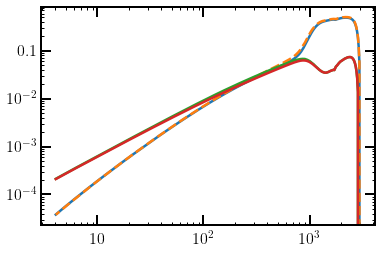

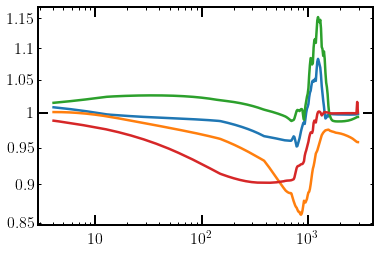

In [ ]:
plt.figure()

plt.loglog()

# plt.xscale('log')

mDM = 2e8

rs_vec = old_data['data']['rs']
f_ion_vec = old_data['data']['f']['H ion']
f_heat_vec = old_data['data']['f']['heat']
f_exc_vec = old_data['data']['f']['Lya']
f_cont_vec = old_data['data']['f']['cont']

rs_vec_new = new_data['data']['rs']
f_ion_vec_new = new_data['data']['f']['H ion']
f_heat_vec_new = new_data['data']['f']['heat']
f_exc_vec_new = new_data['data']['f']['Lya']
f_cont_vec_new = new_data['data']['f']['cont']


f_ion_std = phys.f_std(mDM, rs_vec, inj_particle='phot', inj_type='decay', channel='H ion')
f_heat_std = phys.f_std(mDM, rs_vec, inj_particle='phot', inj_type='decay', channel='heat')
f_exc_std = phys.f_std(mDM, rs_vec, inj_particle='phot', inj_type='decay', channel='exc')
f_cont_std = phys.f_std(mDM, rs_vec, inj_particle='phot', inj_type='decay', channel='cont')


# plt.plot(rs_vec, f_ion_vec_new)
# plt.plot(rs_vec, f_ion_std, '--')
plt.plot(rs_vec, f_heat_vec_new)
plt.plot(rs_vec, f_heat_std, '--')
# plt.plot(rs_vec, f_exc_vec_new)
# plt.plot(rs_vec, f_exc_std, '--')
plt.plot(rs_vec, f_cont_vec)
plt.plot(rs_vec, f_cont_vec_new)
# plt.plot(rs_vec, f_cont_std, '--')

# plt.axis([4, 20, 1e-4, 1e-3])

plt.figure()

plt.loglog()

plt.plot(rs_vec, f_ion_vec_new / f_ion_vec)
plt.plot(rs_vec, f_heat_vec_new / f_heat_vec)
plt.plot(rs_vec, f_exc_vec_new / f_exc_vec)
plt.plot(rs_vec, f_cont_vec_new / f_cont_vec)

In [ ]:
%autoreload

from darkhistory.low_energy.atomic import Ps_to_2p

res = Ps_to_2p(10)

Ps_new_method = {
    '2s': res[1], 
    '2p': res[2], 
    '3s': res[3], 
    '3p': res[4], 
    '3d': res[5], 
    '4s': res[6], 
    '4p': res[7], 
    '4d': res[8], 
    '4f': res[9], 
    '5p': res[11], 
    '6p': res[16], 
    '7p': res[22], 
    '8p': res[29], 
    '9p': res[37], 
    '10p': res[46]
}


In [ ]:
Ps_new_method

{'2s': 0.0,
 '2p': 1.0,
 '3s': 1.0,
 '3p': 0.0,
 '3d': 1.0,
 '4s': 0.5841409742717805,
 '4p': 0.2608922327306947,
 '4d': 0.7455932006434108,
 '4f': 1.0,
 '5p': 0.30783432104631764,
 '6p': 0.3258638681912293,
 '7p': 0.3352507004121098,
 '8p': 0.34097425794513214,
 '9p': 0.3448124151449359,
 '10p': 0.3475539488445977}